[[1.000e+00 9.694e+03]
 [2.000e+00 9.694e+03]
 [3.000e+00 9.692e+03]
 [4.000e+00 9.819e+03]
 [5.000e+00 9.844e+03]
 [6.000e+00 9.810e+03]
 [7.000e+00 9.810e+03]
 [8.000e+00 9.810e+03]
 [9.000e+00 9.810e+03]
 [1.000e+01 9.868e+03]]
(9749, 2)
Parámetros del modelo fp1: [    14.42707448 -12894.1154873 ]
Error del modelo fp1: [2.20870775e+12]
Parámetros del modelo fp2: [1.43634350e-03 4.22725336e-01 9.86528593e+03]
Error del modelo fp2: [1.19935155e+12]
Errores para el conjunto completo de datos:
Error d=1: 2208707746366.480469
Error d=2: 1199351553587.609863
Error d=3: 1163752109264.213379
Error d=10: 358381838242.663147
Error d=5: 649832996529.387329
Error d=6: 549338543880.953064
Errores solamente después del punto de inflexión
Error d=1: 1247401736829.467041
Error d=2: 742359819187.196899
Error d=3: 672213588331.533447
Error d=10: 101954934547.965439
Error d=5: 279927686529.108765
Error d=6: 203128457678.731720
Error de inflexión=1180634100400.420166
Entrenamiento de datos únicamente d

C:\Users\57312\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


shape xb[train] (1076,)
fbt2(x)= 
         2
0.09497 x - 1651 x + 7.28e+06
fbt2(x)-500,000= 
         2
0.09497 x - 1651 x + 6.78e+06
Prueba de error para después del punto de inflexión
Error d=1: 144156301290.982788
Error d=2: 26270284834.058609
Error d=3: 18673169806.986462
Error d=10: 15374976304.204163


C:\Users\57312\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


         2
0.09497 x - 1651 x + 7.28e+06
         2
0.09497 x - 1651 x + 6.78e+06

500,000 pesos por gramo de oro esperados en el lustro 5.883987


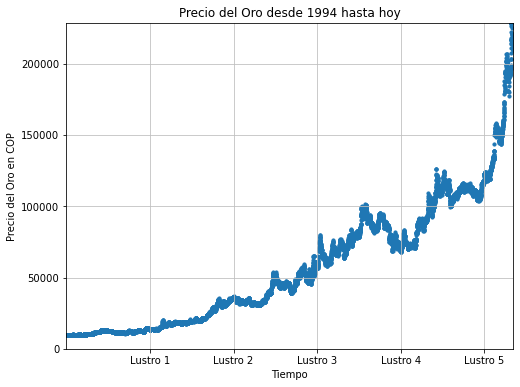

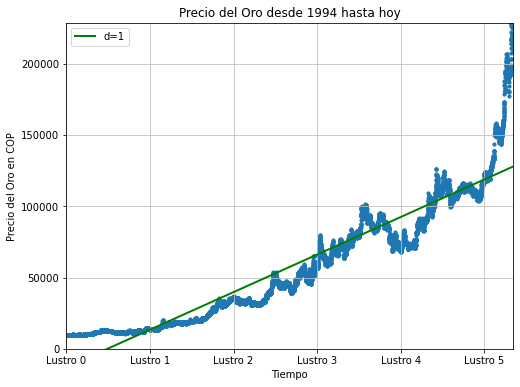

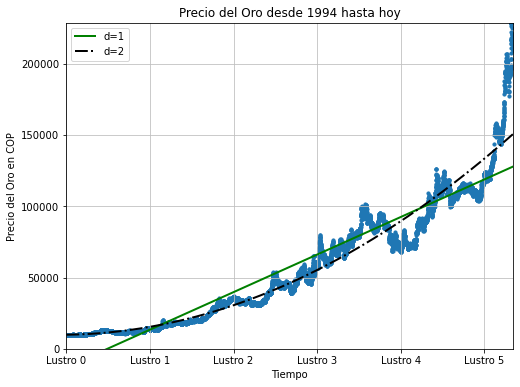

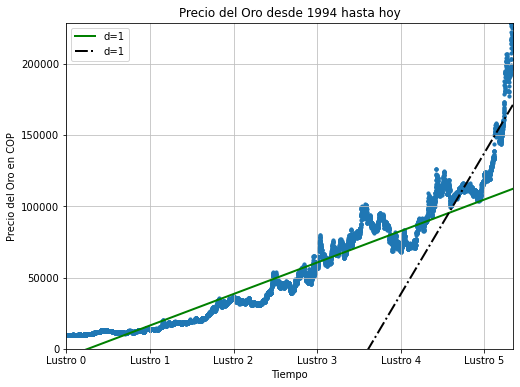

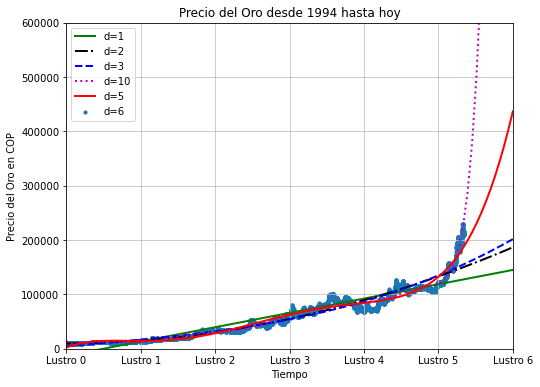

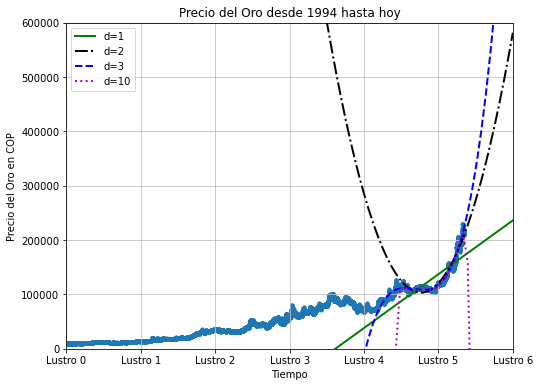

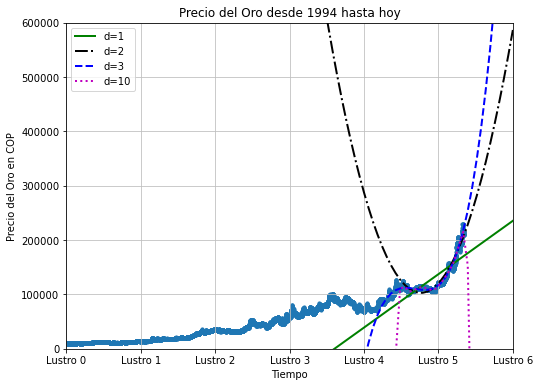

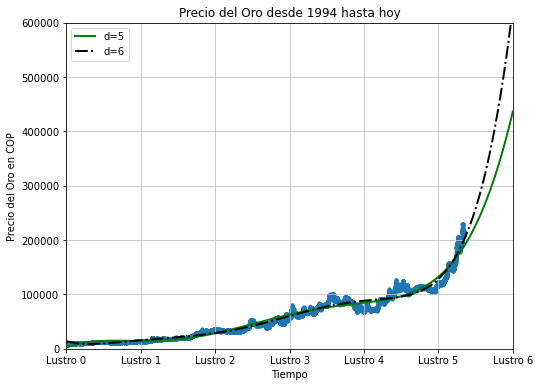

In [13]:
# COMPUTACIÓN BLANDA - Sistemas y Computación

# -----------------------------------------------------------------
# AJUSTES POLINOMIALES
# -----------------------------------------------------------------
# Lección 06
#
# ** Se importan los archivos de trabajo
# ** Se crean las variables
# ** Se generan los modelos
# ** Se grafican las funciones
#
# -----------------------------------------------------------------
# Se importa la librería del Sistema Operativo
# Igualmente, la librería utils y numpy
# -----------------------------------------------------------------
import os
import math
# Directorios: chart y data en el directorio de trabajo
# -----------------------------------------------------------------
from utils import DATA_DIR, CHART_DIR
import numpy as np
# Se eliminan las advertencias por el uso de funciones que
# en el futuro cambiarán
# -----------------------------------------------------------------
np.seterr(all='ignore')
# Se importa la librería scipy y matplotlib
# -----------------------------------------------------------------
import scipy as sp

import matplotlib.pyplot as plt
# Datos de trabajo
# -----------------------------------------------------------------





data = np.genfromtxt(os.path.join(DATA_DIR,"prueba.tsv"), delimiter="\t")

data = np.array(data, dtype=np.float64)
print(data[:10])
print(data.shape)

# Todos los ejemplos tienen tres clases en este archivo
# -----------------------------------------------------------------
colors = ['g', 'k', 'b', 'm', 'r']
linestyles = ['-', '-.', '--', ':', '-']
x = data[:, 0]
y = data[:, 1]





# Se eliminan los datos incorrectos
# -----------------------------------------------------------------

# CON ESTA FUNCIÓN SE DEFINE UN MODELO, EL CUAL CONTIENE
# el comportamiento de un ajuste con base en un grado polinomial
# elegido
# -----------------------------------------------------------------
def plot_models(x, y, models, fname, mx=None, ymax=None, xmin=None):
# dibujar datos de entrada '''

    plt.figure(num=None, figsize=(8, 6))
    plt.clf()
    plt.scatter(x, y, s=10)
    plt.title("Precio del Oro desde 1994 hasta hoy")
    plt.xlabel("Tiempo")
    plt.ylabel("Precio del Oro en COP")
    plt.xticks([w * 365 * 5 for w in range(10)],['Lustro %i' % w for w in range(10)])
    if models:
        if mx is None:
            mx = np.linspace(0, x[-1], 1000)
        for model, style, color in zip(models, linestyles, colors):
        #print("Model:",model)
        #print("Coeffs:",model.coeffs)
            plt.plot(mx, model(mx), linestyle=style, linewidth=2, c=color)
        plt.legend(["d=%i" % m.order for m in models], loc="upper left")
    plt.autoscale(tight=True)
    plt.ylim(ymin=0)
    if ymax:
        plt.ylim(ymax=ymax)
    if xmin:
        plt.xlim(xmin=xmin)
    plt.grid(True, linestyle='-', color='0.75')
    plt.savefig(fname)
# Primera mirada a los datos
# -----------------------------------------------------------------
plot_models(x, y, None, os.path.join(CHART_DIR, "1400_01_01.png"))

# Crea y dibuja los modelos de datos
# -----------------------------------------------------------------
fp1, res1, rank1, sv1, rcond1 = np.polyfit(x, y, 1, full=True)
print("Parámetros del modelo fp1: %s" % fp1)
print("Error del modelo fp1:", res1)
f1 = sp.poly1d(fp1)
fp2, res2, rank2, sv2, rcond2 = np.polyfit(x, y, 2, full=True)
print("Parámetros del modelo fp2: %s" % fp2)
print("Error del modelo fp2:", res2)
f2 = sp.poly1d(fp2)
f3 = sp.poly1d(np.polyfit(x, y, 3))
f10 = sp.poly1d(np.polyfit(x, y, 10))
f5 = sp.poly1d(np.polyfit(x, y, 5))
f6 = sp.poly1d(np.polyfit(x, y, 6))
#f100 = sp.poly1d(np.polyfit(x, y, 68))
# Se grafican los modelos
# -----------------------------------------------------------------
plot_models(x, y, [f1], os.path.join(CHART_DIR, "1400_01_02.png"))
plot_models(x, y, [f1, f2], os.path.join(CHART_DIR, "1400_01_03.png"))
#plot_models(x, y, [f1, f2, f3, f10, f100], os.path.join(CHART_DIR,"1400_01_04.png"))
# Ajusta y dibuja un modelo utilizando el conocimiento del punto
# de inflexión
# -----------------------------------------------------------------
inflexion = math.floor(4.5 * 365 * 5)
xa = x[:int(inflexion)]
ya = y[:int(inflexion)]
xb = x[int(inflexion):]
yb = y[int(inflexion):]

# Se grafican dos líneas rectas
# -----------------------------------------------------------------
fa = sp.poly1d(np.polyfit(xa, ya, 1))
fb = sp.poly1d(np.polyfit(xb, yb, 1))
# Se presenta el modelo basado en el punto de inflexión
# -----------------------------------------------------------------
plot_models(x, y, [fa, fb], os.path.join(CHART_DIR, "1400_01_05.png"))
# Función de error
# -----------------------------------------------------------------
def error(f, x, y):
    return np.sum((f(x) - y) ** 2)
# Se imprimen los errores
# -----------------------------------------------------------------
print("Errores para el conjunto completo de datos:")
for f in [f1, f2, f3, f10,f5,f6]:
    print("Error d=%i: %f" % (f.order, error(f, x, y)))
print("Errores solamente después del punto de inflexión")
for f in [f1, f2, f3, f10,f5,f6]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))
print("Error de inflexión=%f" % (error(fa, xa, ya) + error(fb, xb, yb)))
# Se extrapola de modo que se proyecten respuestas en el futuro
# -----------------------------------------------------------------
plot_models(
    x, y, [f1, f2, f3, f10,f5,f6],
    os.path.join(CHART_DIR, "1400_01_06.png"),
    mx=np.linspace(0 * 365 * 5, 6 * 365 * 5, 100),

    ymax=600000, xmin=0 * 365 * 5)
print("Entrenamiento de datos únicamente despúes del punto de inflexión")
fb1 = fb
fb2 = sp.poly1d(np.polyfit(xb, yb, 2))
fb3 = sp.poly1d(np.polyfit(xb, yb, 3))
fb10 = sp.poly1d(np.polyfit(xb, yb, 10))
#fb100 = sp.poly1d(np.polyfit(xb, yb, 100))
print("Errores después del punto de inflexión")
for f in [fb1, fb2, fb3, fb10]:
    print("Error d=%i: %f" % (f.order, error(f, xb, yb)))
# Gráficas después del punto de inflexión
# -----------------------------------------------------------------
plot_models(
x, y, [fb1, fb2, fb3, fb10],
os.path.join(CHART_DIR, "1400_01_07.png"),
mx=np.linspace(0 * 365 * 5, 6 * 365 * 5, 100),
ymax=600000, xmin=0 * 365 * 5)
# Separa el entrenamiento de los datos de prueba
# -----------------------------------------------------------------
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
print("shape xb[train]", xb[train].shape)
fbt1 = sp.poly1d(np.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(np.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-500,000= \n%s" % (fbt2-500000))
fbt3 = sp.poly1d(np.polyfit(xb[train], yb[train], 3))

fbt10 = sp.poly1d(np.polyfit(xb[train], yb[train], 10))
#fbt100 = sp.poly1d(np.polyfit(xb[train], yb[train], 100))
print("Prueba de error para después del punto de inflexión")
for f in [fbt1, fbt2, fbt3, fbt10]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))
plot_models(
    x, y, [fbt1, fbt2, fbt3, fbt10],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 365 * 5, 6 * 365 * 5, 100),
    ymax=600000, xmin=0 * 365 * 5)
#prueba
plot_models(
    x, y, [f5,f6],
    os.path.join(CHART_DIR, "1400_01_08.png"),
    mx=np.linspace(0 * 365 * 5, 6 * 365 * 5, 100),
    ymax=600000, xmin=0 * 365 * 5)
#prueba

from scipy.optimize import fsolve
print(fbt2)
print(fbt2 - 500000)
alcanzado_max = fsolve(fbt2 - 500000, x0=9200) / (365 * 5)
print("\n500,000 pesos por gramo de oro esperados en el lustro %f" % alcanzado_max[0])


#xdxdxdxddxdddxdxdxdxddxddxddxxdddxxxxdxxdxdxdxdxddxdxdddxxdxxdd



In [16]:
print("hola")

hola


In [3]:
print("hola")

hola
